In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [10]:
#Cargamos los datos del archivo: week3

data = pd.read_csv('C:/Users/HP/Documents/ASIGNACIÓN 2 INTRODUCCION A CIENCIA DE DATOS/week3.csv')

X = data.iloc[:, :2].values  # Seleccionamos las dos primeras columnas como nuestras características
Y = data.iloc[:, 2].values   # Seleccionamos la tercera columna como la Variable Objetivo

#Dividimos los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(data.head())



     X1    X2         Y
0  0.90  0.59  0.269979
1 -0.40 -0.10  0.118625
2  0.34 -0.38  0.544309
3 -0.69  0.53 -0.124747
4  0.81  0.23  0.460403


In [11]:
#Características Polinómicas Adicionales

from sklearn.preprocessing import PolynomialFeatures #Utilizaremos la función PolynomialFeatures de sklearn 

# Usamos PolynomialFeatures para generar características hasta grado 5
poly = PolynomialFeatures(degree=5)

# Definimos cuales son nuestras características en el dataframe
X = data[['X1', 'X2']]

# Transformamos X, para así poder generar y agregar las características polinómicas
X_poly = poly.fit_transform(X)

# Imprimimos nuestras nuevas características polinómicas
print(f"Características polinómicas:\n{poly.get_feature_names_out(['X1', 'X2'])}\n")
print(X_poly[:5])  # Mostramos las primeras cinco filas


Características polinómicas:
['1' 'X1' 'X2' 'X1^2' 'X1 X2' 'X2^2' 'X1^3' 'X1^2 X2' 'X1 X2^2' 'X2^3'
 'X1^4' 'X1^3 X2' 'X1^2 X2^2' 'X1 X2^3' 'X2^4' 'X1^5' 'X1^4 X2'
 'X1^3 X2^2' 'X1^2 X2^3' 'X1 X2^4' 'X2^5']

[[ 1.00000000e+00  9.00000000e-01  5.90000000e-01  8.10000000e-01
   5.31000000e-01  3.48100000e-01  7.29000000e-01  4.77900000e-01
   3.13290000e-01  2.05379000e-01  6.56100000e-01  4.30110000e-01
   2.81961000e-01  1.84841100e-01  1.21173610e-01  5.90490000e-01
   3.87099000e-01  2.53764900e-01  1.66356990e-01  1.09056249e-01
   7.14924299e-02]
 [ 1.00000000e+00 -4.00000000e-01 -1.00000000e-01  1.60000000e-01
   4.00000000e-02  1.00000000e-02 -6.40000000e-02 -1.60000000e-02
  -4.00000000e-03 -1.00000000e-03  2.56000000e-02  6.40000000e-03
   1.60000000e-03  4.00000000e-04  1.00000000e-04 -1.02400000e-02
  -2.56000000e-03 -6.40000000e-04 -1.60000000e-04 -4.00000000e-05
  -1.00000000e-05]
 [ 1.00000000e+00  3.40000000e-01 -3.80000000e-01  1.15600000e-01
  -1.29200000e-01  1.4440000

In [12]:
print(f"Original columns: {X.shape[1]}, New columns: {X_poly.shape[1]}")

Original columns: 2, New columns: 21


In [13]:
#Usamos el mismo modelos de regresión de Lasso con características polinómicas que desarrollamos en (i)


#Definimos nuestro rango de valores de C
C_values = [1, 10, 100, 1000]

#Para trabajar el modelo de regresión Lasso, debemos convertir los valores de C a alpha (alpha = 1/C)

alpha_values = [1/c for c in C_values]

#Para los modelos de regresión de Lasso, el valor C y el valor de alpha (α) son inversamente proporcionales.
#Entonces, si C disminuye, α aumenta, y si C aumenta, α disminuye.

# Entrenamos un modelo para cada valor de C
for alpha, C in zip(alpha_values, C_values):

    # Creamos el modelo Lasso con el valor de alpha correspondiente
    model = Lasso(alpha=alpha, max_iter=10000)
    param_grid = {'alpha': alpha_values}

# Entrenamos el modelo con las características polinómicas y la variable objetivo
    model.fit(X_poly, data['Y'])
    
    # Imprimimos los coeficientes que obtuvimos para el modelo
    print(f"\nResultados para C = {C} (alpha = {alpha}):")
    for coef, feature in zip(model.coef_, poly.get_feature_names_out()):
        print(f"{feature}: {coef}")


Resultados para C = 1 (alpha = 1.0):
1: 0.0
X1: 0.0
X2: -0.0
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^2: 0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: -0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: 0.0
X1^4 X2: -0.0
X1^3 X2^2: 0.0
X1^2 X2^3: -0.0
X1 X2^4: 0.0
X2^5: -0.0

Resultados para C = 10 (alpha = 0.1):
1: 0.0
X1: 0.0
X2: -0.7592007341941692
X1^2: 0.0
X1 X2: -0.0
X2^2: 0.0
X1^3: 0.0
X1^2 X2: -0.0
X1 X2^2: 0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: -0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: 0.0
X1^4 X2: -0.0
X1^3 X2^2: 0.0
X1^2 X2^3: -0.0
X1 X2^4: 0.0
X2^5: -0.0

Resultados para C = 100 (alpha = 0.01):
1: 0.0
X1: -0.0
X2: -0.9973566952239966
X1^2: 0.8985744508163679
X1 X2: 0.0
X2^2: 0.0
X1^3: -0.0
X1^2 X2: 0.0
X1 X2^2: -0.0
X2^3: -0.0
X1^4: 0.0
X1^3 X2: 0.0
X1^2 X2^2: 0.0
X1 X2^3: -0.0
X2^4: 0.0
X1^5: -0.0
X1^4 X2: 0.0
X1^3 X2^2: -0.0
X1^2 X2^3: 0.0
X1 X2^4: -0.0
X2^5: -0.0

Resultados para C = 1000 (alpha = 0.001):
1: 0.0
X1: 0.0
X2: -1.0649190700606501
X1^2: 0.91623307

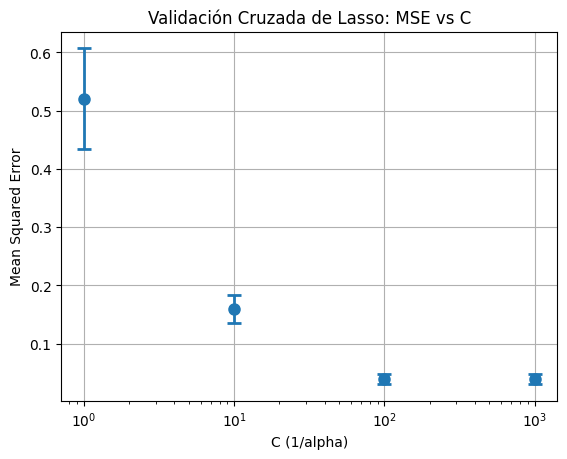

Resultados detallados de la validación cruzada para cada C:
C = 1: MSE medio = 0.5200, Desviación estándar = 0.0867
C = 10: MSE medio = 0.1594, Desviación estándar = 0.0246
C = 100: MSE medio = 0.0393, Desviación estándar = 0.0089
C = 1000: MSE medio = 0.0394, Desviación estándar = 0.0080
El valor óptimo de alpha es: 0.0100, correspondiente a C = 100.0000


In [15]:
#APARTADOS A Y B (LASSO)

#Usando el modelo Lasso con características polinómicas, ahora utilizaremos validación cruzada para seleccionar C.

#(a) Usa validación cruzada de 5 particiones para graficar el promedio y la desviación estándar del error de predicción frente a C. 
#Usa la función errorbar de matplotlib para esto. Necesitarás elegir el rango de valores de C para graficar, justifica tu elección.

# Usamos los mismos valores de C con los que entrenamos el modelo Lasso
C_values = [1, 10, 100, 1000]
alpha_values = [1 / c for c in C_values]

# Calculamos el MSE usando validación cruzada de 5 particiones
mse_means = []
mse_stds = []
for alpha in alpha_values:
    model.alpha = alpha  # Actualiza el valor de alpha en el modelo existente
    results = cross_validate(model, X_poly, Y, scoring='neg_mean_squared_error', cv=5, return_train_score=False)
    mse_scores = -results['test_score']  # Convertimos los scores a positivos
    mse_means.append(np.mean(mse_scores))
    mse_stds.append(np.std(mse_scores))

# Graficamos el promedio y la desviación estándar del error de predicción frente a C usando errorbar
plt.errorbar(C_values, mse_means, yerr=mse_stds, fmt='o', markersize=8, elinewidth=2, capsize=5, capthick=2)
plt.xscale('log')
plt.xlabel('C (1/alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Validación Cruzada de Lasso: MSE vs C')
plt.grid(True)
plt.show()

# Resultados de la validación cruzada para cada C
print("Resultados detallados de la validación cruzada para cada C:")
for C, mean, std in zip(C_values, mse_means, mse_stds):
    print(f"C = {C}: MSE medio = {mean:.4f}, Desviación estándar = {std:.4f}")

# El mejor valor de alpha y C
best_index = np.argmin(mse_means)  # Índice del menor MSE medio
best_alpha = alpha_values[best_index]
best_C = 1 / best_alpha
print(f"El valor óptimo de alpha es: {best_alpha:.4f}, correspondiente a C = {best_C:.4f}")

In [17]:
#APARTADO C

#Características Polinómicas y Entrenamiento de Modelos Ridge

#Características Polinómicas

poly = PolynomialFeatures(degree=5)
X = data[['X1', 'X2']]  # Seleccionamos las características
X_poly = poly.fit_transform(X)  # Transformación polinómica

# Imprimimos las características polinómicas generadas
print(f"Características polinómicas:\n{poly.get_feature_names_out(['X1', 'X2'])}\n")
print(X_poly[:5])
print(f"Original columns: {X.shape[1]}, New columns: {X_poly.shape[1]}")


Características polinómicas:
['1' 'X1' 'X2' 'X1^2' 'X1 X2' 'X2^2' 'X1^3' 'X1^2 X2' 'X1 X2^2' 'X2^3'
 'X1^4' 'X1^3 X2' 'X1^2 X2^2' 'X1 X2^3' 'X2^4' 'X1^5' 'X1^4 X2'
 'X1^3 X2^2' 'X1^2 X2^3' 'X1 X2^4' 'X2^5']

[[ 1.00000000e+00  9.00000000e-01  5.90000000e-01  8.10000000e-01
   5.31000000e-01  3.48100000e-01  7.29000000e-01  4.77900000e-01
   3.13290000e-01  2.05379000e-01  6.56100000e-01  4.30110000e-01
   2.81961000e-01  1.84841100e-01  1.21173610e-01  5.90490000e-01
   3.87099000e-01  2.53764900e-01  1.66356990e-01  1.09056249e-01
   7.14924299e-02]
 [ 1.00000000e+00 -4.00000000e-01 -1.00000000e-01  1.60000000e-01
   4.00000000e-02  1.00000000e-02 -6.40000000e-02 -1.60000000e-02
  -4.00000000e-03 -1.00000000e-03  2.56000000e-02  6.40000000e-03
   1.60000000e-03  4.00000000e-04  1.00000000e-04 -1.02400000e-02
  -2.56000000e-03 -6.40000000e-04 -1.60000000e-04 -4.00000000e-05
  -1.00000000e-05]
 [ 1.00000000e+00  3.40000000e-01 -3.80000000e-01  1.15600000e-01
  -1.29200000e-01  1.4440000

In [18]:
# Entrenamiento del modelo Ridge con varios valores de C
C_values = [1, 10, 100, 1000]
alpha_values = [1/c for c in C_values]  # Conversión de C a alpha

# Entrenamos un modelo Ridge para cada valor de C
for alpha, C in zip(alpha_values, C_values):
    model = Ridge(alpha=alpha, max_iter=10000)
    model.fit(X_poly, data['Y'])  # Entrenamiento del modelo
    print(f"\nResultados para C = {C} (alpha = {alpha}):")
    for coef, feature in zip(model.coef_, poly.get_feature_names_out()):
        print(f"{feature}: {coef}")


Resultados para C = 1 (alpha = 1.0):
1: 0.0
X1: 0.04151925069416773
X2: -0.9766420105173507
X1^2: 0.6166962022569543
X1 X2: 0.006625969366431846
X2^2: -0.025538333290221198
X1^3: -0.045573305040478025
X1^2 X2: 0.07013819621793448
X1 X2^2: -0.11113564091639043
X2^3: -0.13220033063764747
X1^4: 0.36656444947613104
X1^3 X2: 0.09747557773706254
X1^2 X2^2: 0.13454816816707646
X1 X2^3: -0.06211861233917442
X2^4: -0.0008502974354951371
X1^5: -0.00030064324915689056
X1^4 X2: 0.03897675109765461
X1^3 X2^2: 0.02189622975644265
X1^2 X2^3: -0.0494930293313087
X1 X2^4: -0.02448379947860631
X2^5: 0.0305489123247204

Resultados para C = 10 (alpha = 0.1):
1: 0.0
X1: 0.09776615645224267
X2: -1.12816079356421
X1^2: 0.7289354448912896
X1 X2: -0.019990024514404296
X2^2: -0.02494827905057212
X1^3: -0.17400654515338881
X1^2 X2: 0.35997518105044973
X1 X2^2: -0.2663398901893836
X2^3: 0.04962227542242888
X1^4: 0.2830606719481492
X1^3 X2: 0.1639016901151386
X1^2 X2^2: 0.11205982665880818
X1 X2^3: -0.08742043885

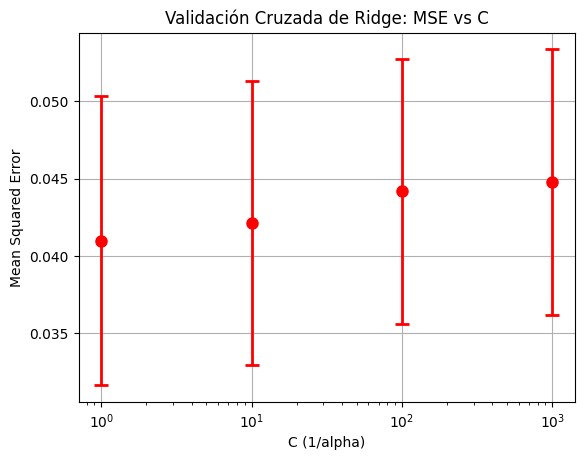

Resultados detallados de la validación cruzada para cada C:
C = 1: MSE medio = 0.0410, Desviación estándar = 0.0093
C = 10: MSE medio = 0.0421, Desviación estándar = 0.0092
C = 100: MSE medio = 0.0442, Desviación estándar = 0.0086
C = 1000: MSE medio = 0.0448, Desviación estándar = 0.0086
El valor óptimo de alpha es: 1.0000, correspondiente a C = 1.0000


In [20]:
# Usamos los mismos valores de C con los que entrenamos el modelo
C_values = [1, 10, 100, 1000]
alpha_values = [1 / c for c in C_values]  

# Modelo Ridge
model = Ridge(max_iter=10000)  # Se establece un número alto de iteraciones para asegurar la convergencia

# Calculamos el MSE usando validación cruzada de 5 particiones
mse_means = []
mse_stds = []
for alpha in alpha_values:
    model.alpha = alpha  # Actualiza el valor de alpha en el modelo existente
    results = cross_validate(model, X_poly, Y, scoring='neg_mean_squared_error', cv=5, return_train_score=False)
    mse_scores = -results['test_score']  # Convertimos los scores a positivos
    mse_means.append(np.mean(mse_scores))
    mse_stds.append(np.std(mse_scores))

# Graficamos el promedio y la desviación estándar del error de predicción frente a C usando errorbar
plt.errorbar(C_values, mse_means, yerr=mse_stds, fmt='o', markersize=8, elinewidth=2, capsize=5, capthick=2, color='red')
plt.xscale('log')
plt.xlabel('C (1/alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Validación Cruzada de Ridge: MSE vs C')
plt.grid(True)
plt.show()

# Resultados de la validación cruzada para cada C
print("Resultados detallados de la validación cruzada para cada C:")
for C, mean, std in zip(C_values, mse_means, mse_stds):
    print(f"C = {C}: MSE medio = {mean:.4f}, Desviación estándar = {std:.4f}")

# El mejor valor de alpha y C
best_index = np.argmin(mse_means)  # Índice del menor MSE medio
best_alpha = alpha_values[best_index]
best_C = 1 / best_alpha
print(f"El valor óptimo de alpha es: {best_alpha:.4f}, correspondiente a C = {best_C:.4f}")